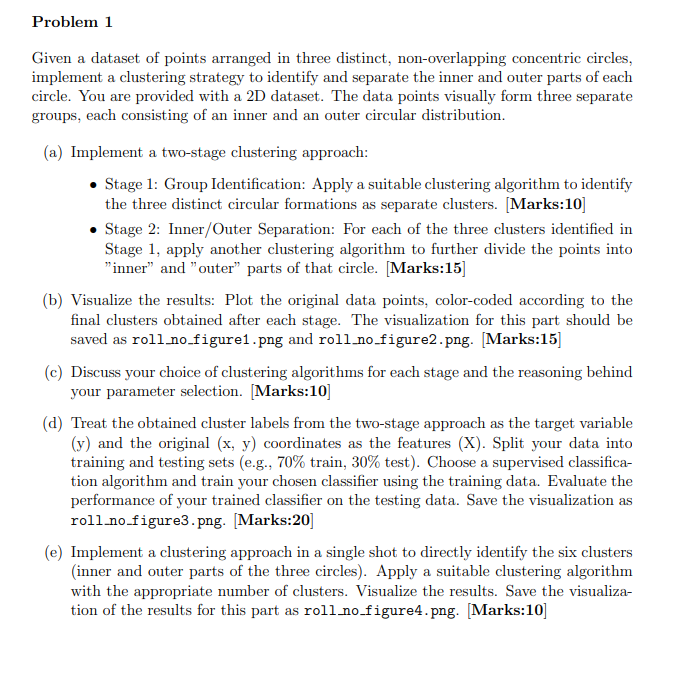

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering,AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

In [ ]:
data = np.load("assignment7_data.npy")   #binary file format in numpy 
data.shape

(300, 2)

In [ ]:
# data[100]

array([-4.48838218,  1.30833006])

In [ ]:
# pre-processing 

# different for npy data 
np.isnan(data).sum()

0

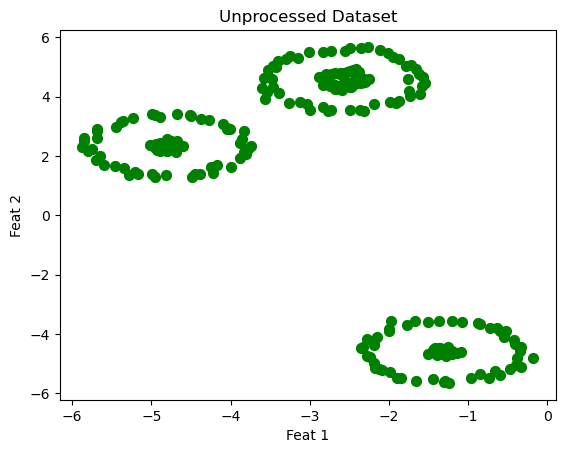

In [7]:
# Ploting the data points
plt.scatter(data[:, 0], data[:, 1], s=50,color='green')
plt.title('Unprocessed Dataset')
plt.xlabel('Feat 1')
plt.ylabel('Feat 2')
plt.savefig("ch24m571_unprocessed_dataset_plot.png")

In [14]:
X = data.copy()

d:\Applications\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


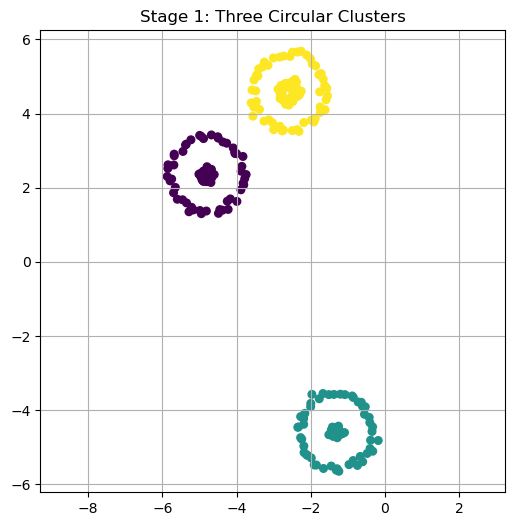

In [11]:
from sklearn.cluster import KMeans

# Stage 1: Apply KMeans to identify 3 clusters
kmeans_stage1 = KMeans(n_clusters=3, random_state=42)
labels_stage1 = kmeans_stage1.fit_predict(data)

# Visualize stage 1 clustering
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_stage1, cmap='viridis', s=30)
plt.title("Stage 1: Three Circular Clusters")
plt.axis('equal')
plt.grid(True)
plt.savefig("rollno_figure1.png")
plt.show()

d:\Applications\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Applications\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Applications\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


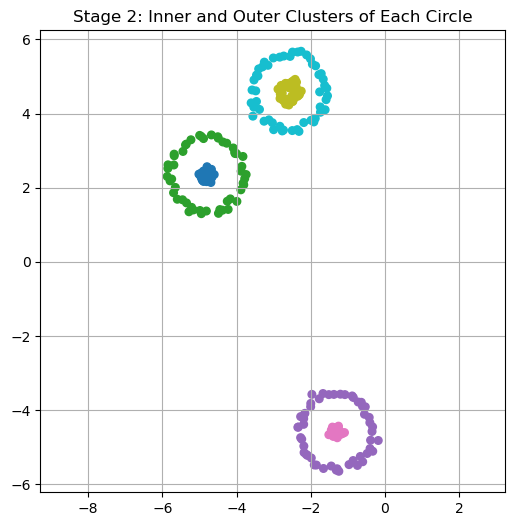

In [ ]:
# Stage 2: Inner/Outer separation within each of the 3 clusters
from sklearn.metrics import pairwise_distances_argmin_min

labels_stage2 = np.zeros_like(labels_stage1)

offset = 0
new_label = 0
for cluster_id in np.unique(labels_stage1):
    cluster_points = data[labels_stage1 == cluster_id]
    centroid = kmeans_stage1.cluster_centers_[cluster_id]
    
    # Compute distance from centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1).reshape(-1, 1)
    
    # Apply KMeans to distances for inner/outer separation
    kmeans_inner_outer = KMeans(n_clusters=2, random_state=42)
    inner_outer_labels = kmeans_inner_outer.fit_predict(distances)
    
    # Assign new labels
    indices = np.where(labels_stage1 == cluster_id)[0]
    labels_stage2[indices] = inner_outer_labels + new_label
    new_label += 2

# Visualize stage 2 clustering
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_stage2, cmap='tab10', s=30)
plt.title("Stage 2: Inner and Outer Clusters of Each Circle")
plt.axis('equal')
plt.grid(True)
plt.savefig("CH24M571_figure2.png")
plt.show()

In [ ]:
# part d : Classification 

# X = data from npy
# y = data from 2 stage clustering 
X = data         # 2D coordinates (features)
y = labels_stage2  # cluster index (target class)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]


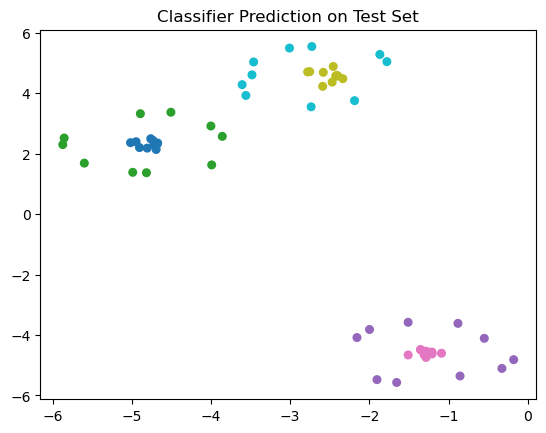

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='tab10', s=30)
plt.title("Classifier Prediction on Test Set")
plt.savefig("rollno_figure3.png")
plt.show()

ExtraTrees Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]


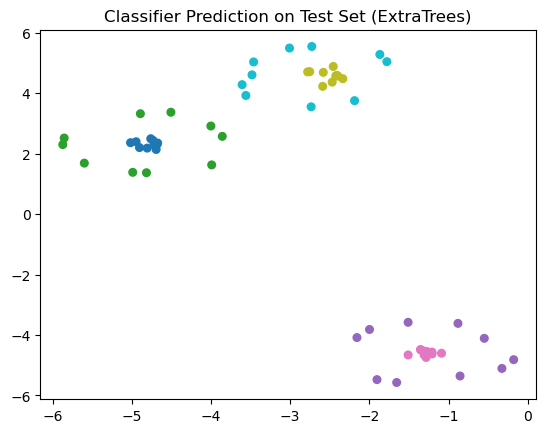

In [19]:
# ExtraTrees Classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the ExtraTreesClassifier
clf_et = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_et.fit(X_train, y_train)
y_pred_et = clf_et.predict(X_test)

# Evaluate the classifier
print("ExtraTrees Classifier Report:")
print(classification_report(y_test, y_pred_et))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_et))

# Visualize the predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_et, cmap='tab10', s=30)
plt.title("Classifier Prediction on Test Set (ExtraTrees)")
plt.savefig("rollno_figure_extra_trees.png")
plt.show()

d:\Applications\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


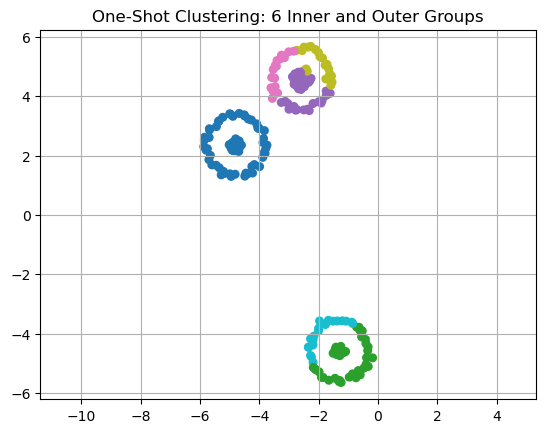

In [18]:
# part e - one shot clustering 

from sklearn.cluster import KMeans

kmeans_six = KMeans(n_clusters=6, random_state=42)
labels_six = kmeans_six.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels_six, cmap='tab10', s=30)
plt.title("One-Shot Clustering: 6 Inner and Outer Groups")
plt.axis('equal')
plt.grid(True)
plt.savefig("rollno_figure4.png")
plt.show()
